In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [2]:
# Sigmoid function
def sigmoid(x):
     return 1.0/(1+ np.exp(-x))
    
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
     return x * (1.0 - x)
    
    
class NeuralNetwork:
    def __init__(self, x, y, N):
            self.input = x
            self.neuron = N
            self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
            self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
            self.y = y
            self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
            self.layer1 = sigmoid(np.dot(self.input, self.weights1))
            self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
     # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
            d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
            d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
             # weights updating
            self.weights1 += d_weights1
            self.weights2 += d_weights2
            
            


Task1


The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.82859603e-04]
 [1.85631056e-02]
 [1.85631056e-02]
 [4.98088060e-01]]


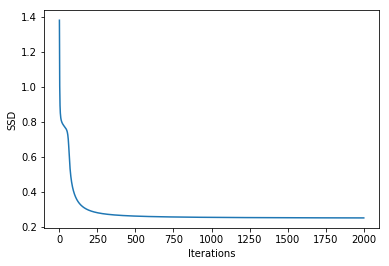

In [3]:
iterations = 2000
n_unit = 1
if __name__ == "__main__":

    Input= np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

    Target = np.array([[0],[0],[0],[1]])

    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

Task2

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01954945]
 [0.98007252]
 [0.49932707]
 [0.50082452]]


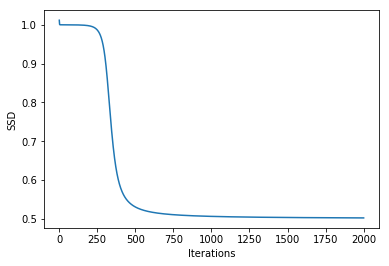

In [4]:
iterations = 2000
n_unit = 2
if __name__ == "__main__":

    Input= np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

    Target = np.array([[0],[1],[1],[0]])

    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

Task3

In [5]:
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
 optimizer = SGD(lr = 0.01),
 metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 10000, verbose=0)
print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.13733229]
 [0.9148805 ]
 [0.90431225]
 [0.08339447]]
